# Life Expectancy Project

We are going to use Life expectancy Dataset provided by the WHO to predict the life expextancy of an individual depending on the Factors affecting it.

Dataset source: KAGGLE

Let's import the important libraries to operate the data.

In [49]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us read the Dataset using Pandas 'read_csv' command.

In [2]:
data=pd.read_csv('Life Expectancy Data.csv')

# Let us name our dataset as 'data'. And load it to see what it has init.

In [3]:
data.head(n=5)

# Let us load first five observations of our dataset.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Looks like huge dataset with over 20 features. Its almost not possible to get insight from this dataset by just loading its head. Lets read the info and check for its total number of observations and examine it whether it has null values or not.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

It has 22 columns and nearly 3000 entries and with the inequality in no. of observations from each feature it is clear that it has got some null values. Lets try to fix them up and try to solve the problem.

It has 20 Quantitative and 2 Qualitative features.

Let us explore and find where the null values are actually present in the Dataset. It is kind of easy to visualize it rather than having it in any other format. Luckily we have heatmaps which uses isnull command to highlight the null values.

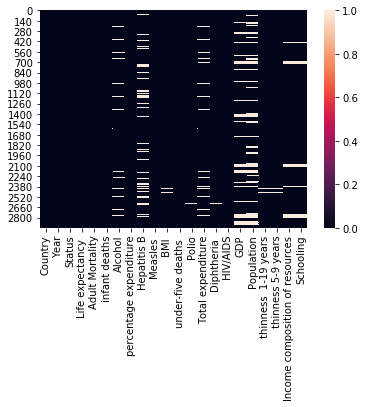

In [6]:
sns.heatmap(pd.isnull(data));

# This plot highlights the null values.

## How do we impute NULL VALUES ?

In genral we impute null values using the MEAN, MEDIAN Or MODE of that specific feature. Lets see how many null values does each of the features has.

Let us write a simple algorithm which prints a dataframe which shows no. of nans from each column.

In [59]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


We can see in columns like 'Life Expectancy' and 'Adult Mortality' there were few Nans values which wasn't visible in our heatmap. So lets fill them up with their average value as they are Continous features.

In [32]:
# This piece of code will fill the null values of the selected feature with its mean.
# This one is for filling Nans in 'Life expectancy' column.

data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())

# Lets also do the same for Adult Mortality.

data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())


Now Lets move on to filling the other columns as well. We will move one by one by filling the Nans of each feature. Our next in target is "ALCOHOL" feature which has almost about 194 Nans.

But wait ! We are filling about 200 Nans, Is it ok fill Nans with MEAN this time ? the answer is absolutely Yes. But I thought of doing it in a different way. As it has Nans 20 times larger than the previous one, I thought to fill it using other column which represents best this column. 

It is always good to fill Nans using bunch of different values as we know that a feature is less likely to have a continous value about 200 or more times and Iam pretty sure that by doing this we would definitely come up with a good result.

To do this let us first see the correlation matrix of these features using '.corr' method by pandas.

In [34]:
corr_data=data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


As you can see there are some features that are quite well correlated with each other. So, we would impute these nans using the other features which are nicely correlated with eachother.

Let us now Visualise these correlation values using a heatmap again.

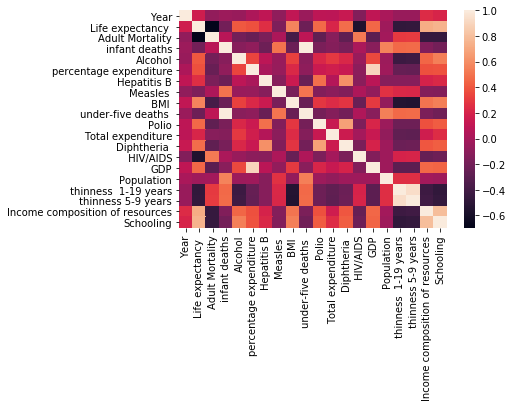

In [35]:
sns.heatmap(corr_data)

The DARKEST and the LIGHTEST blocks represets that there is a strong relationship between those attributes.

From the above correlation matrix 'Alcohol' feature nicely correlates with the 'Schooling' feature. Now lets plot a Scatterplot between them and observe the trend.

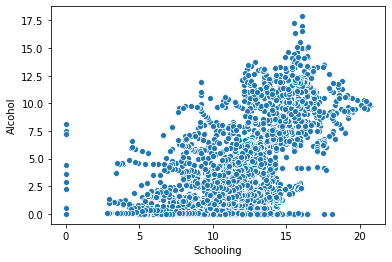

In [39]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

#The semicolon atlast in the code is to hide the address of the plot which is not that required but I personally like doing that

- I have selected these values for imputing the Nans by observing a the trends in between selected interval.

Ex: The mean value of Alcohol which is in between 5-10 of Schooling column is 4.0

In [40]:
# These values are mean values of the selected interval of other feature.

def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

Now lets cross check whether values were filled or not by using the same heatmap.

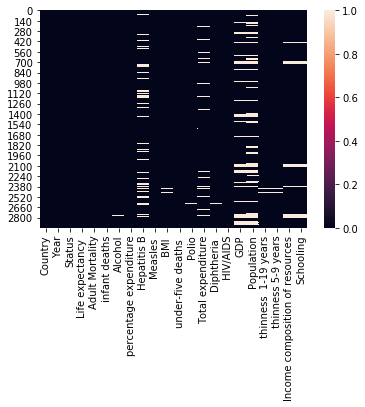

In [41]:
sns.heatmap(pd.isnull(data))

##### Looks like we are still left with some Nans. But why did this exactly happened ?

If we could observe from the heatmap the zone in which null values were failed to be filled is the same zone in which the other feature had its Null values. So for now lets fill those remaining Nans with the Mean Value.

In [43]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

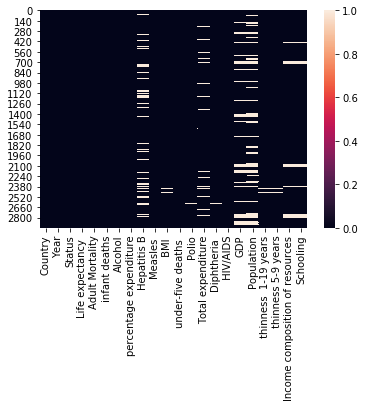

In [44]:
# Rechecking the Heatmap.
sns.heatmap(pd.isnull(data))

Now we dont have any null values in 'alcohol' olumn.

Lets look at the distribution of the alcohol column.

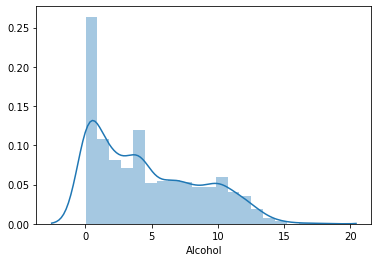

In [47]:
sns.distplot(data['Alcohol']);

There is a huge positive skew for this distribution. Lets look at its Kurtosis value.

In [56]:
scipy.stats.skew(data['Alcohol'],axis=0)

# This shows that this column has positive skew.

0.5964252568271255

 Lets repeat this for imputing  Nans for all other features as well.

#### Important observations:

- Now our next in list is 'Hepatatis B' which highly correlates with 'Diptheria', But both of them have null values in the same zone.


- If we want to impute 'Diptheria' first with highly correlated feature 'Polio' then that again would be of no use because it has again the same problem of null values(Nans) in same Zone.

** But luckily we found an option of imputing 'Polio' feature with the 'Life expactancy' which nicely correlates with it. So for now lets impute 'Polio' feature firstly with 'Life expactancy' and then would impute others using this

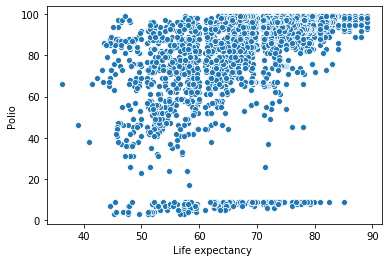

In [107]:
sns.scatterplot(x=data['Life expectancy '],y=data['Polio']);

# Scattterplot between them.

Imputing the selected values for each interval. It is the same way like we did for the 'Alcohol' feature.

In [57]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

Lets have a look at the Null values again

In [60]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


Now we dont have any nulls in polio section. Lets impute 'Diphtheria' using 'Polio' feature.

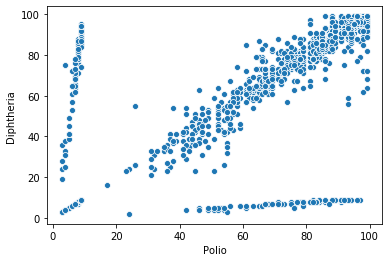

In [106]:
# Scatter plot between these features.

sns.scatterplot(x=data['Polio'],y=data['Diphtheria ']);

In [62]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

In [64]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

# A look at the null values again.

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


Now its time for imputing 'Hepatitis B' using 'Diptheria' feature.

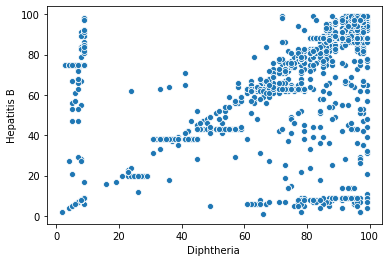

In [105]:
sns.scatterplot(x=data['Diphtheria '],y=data['Hepatitis B']);

# Scatterplot between them.

In [66]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [68]:
data[data['Diphtheria ']>80.0]['Hepatitis B'].mean()

# Mean for imputing Diptheria Nans in 80-100 interval.

88.39573481687472

Now again cross checking the imputed values.

In [69]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


Lets repeat this for all the features.

### Here is the list of features that we are going to impute with other features:

- Impute 'BMI' feature with 'Life expactancy' feature.

- Impute 'Total expenditure' with 'Alcohol' feature.

- Impute 'GDP' feature with 'percentage expenditure	' feature.

- Impute 'Population' feature with 'Infant death' feature.

- Impute 'Thin 1-19' feature with 'BMI' feature.

- Impute 'Thin 5-9' feature with 'BMI' feature.

- Impute 'Schooling' feature and 'Income Composition of resources' feature with 'Life expactancy' feature.

Lets begin the process of imputing. 

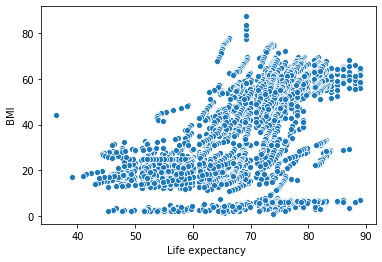

In [104]:
sns.scatterplot(x=data['Life expectancy '],y=data[' BMI ']);

In [84]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

In [101]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


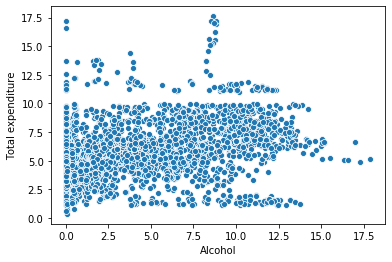

In [100]:
sns.scatterplot(y=data['Total expenditure'],x=data['Alcohol']);

In [99]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)        

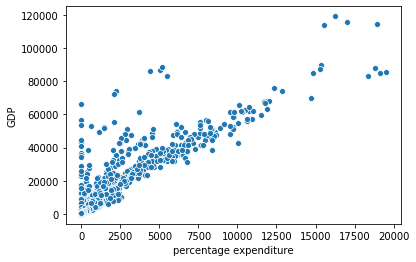

In [103]:
sns.scatterplot(x=data['percentage expenditure'],y=data['GDP']);

In [108]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

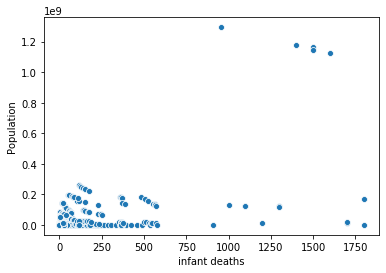

In [123]:
sns.scatterplot(x=data['infant deaths'],y=data['Population']);

In [124]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

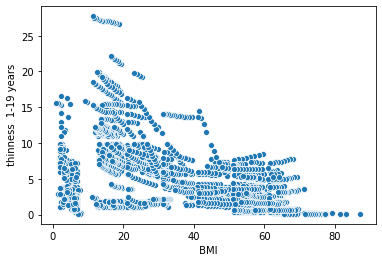

In [128]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness  1-19 years']);

In [131]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

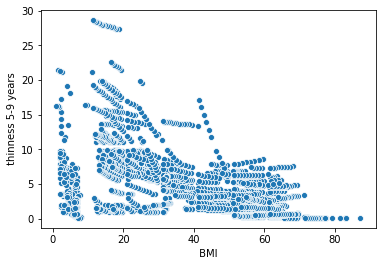

In [137]:
sns.scatterplot(x=data[' BMI '],y=data[' thinness 5-9 years']);

In [136]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

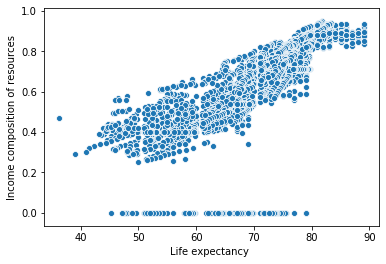

In [146]:
sns.scatterplot(x=data['Life expectancy '],y=data['Income composition of resources']);

In [145]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)      

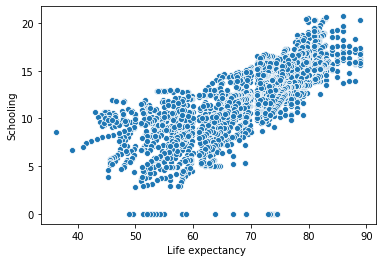

In [147]:
sns.scatterplot(x=data['Life expectancy '],y=data['Schooling']);

In [153]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [152]:
data[(data['Life expectancy ']>80) & (data['Life expectancy ']<=90)]['Schooling'].mean()

# Example of how iam deciding values for filling Nans above
# You can see above in range above 80 we got avg. as 16.5 so we have imputed it that way.

16.510504201680675

Now as we have finished filling Nans lets have a look at that null_df which shows no. of Nans.

In [154]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


Now none of them above features have Nans in them, Let us split the dataset and look for fitting a model.

As we are predicting Life Expectancy our 'Target'(y) variable will be 'Life expectancy'. And remaining attributes would be considered as X or Predictors.

Let us check our Target Variable, also its distribution.

In [155]:
y=data['Life expectancy ']

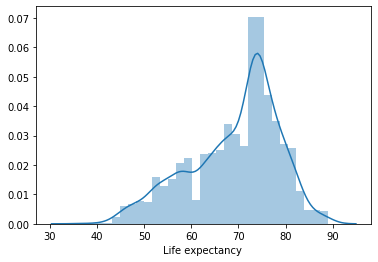

In [157]:
sns.distplot(y);

It almost have a normal distribution with negative skew.

lets check our X or Predictors dataset.

In [164]:
X=data.drop('Life expectancy ',axis=1)

lets see info of our X data.

In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null

Oops! There are 'object' type of features in our Predictor(X) dataset. Lets explore them and try to convert them into numericals.

In [166]:
X['Country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object

In [169]:
# Lets see unique values of this feature.

X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [171]:
# Lets see number of unique values.
X['Country'].nunique()

193

In [172]:
# Lets have look at the other object type feature.
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

We can create dummy variables for this objects to fit well in the model. Lets build the dummy variables.

In [174]:
Country_dummy=pd.get_dummies(X['Country'])
# Dummy variables for Country feature.

In [175]:
status_dummy=pd.get_dummies(X['Status'])
# Dummy variables for status feature.

Now lets concatenate these 'Dummies' with our X dataset.

firstly lets drop those two object features and then concatenate it.

In [176]:
X.drop(['Country','Status'],inplace=True,axis=1)

In [177]:
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [179]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


Now this looks good we have about 214 columns.

Now lets split the model

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
# Lets set 30% for testing and 70% for training the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Lets solve this problem by using Linear Regression and see what it gives us.

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
Linear_model= LinearRegression()

In [184]:
Linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have fit our model, Now lets go for testing !

In [185]:
predictions1=Linear_model.predict(X_test)

# Naming it predictions1 because we are going to use some more models now.

Looks like we have got our predictions, lets have a look at our predictions.

In [188]:
predictions1[0:10]

# First 10 predictions.

array([52.900033  , 54.39454263, 83.57223713, 63.42111731, 73.59599193,
       72.44789192, 69.22029905, 80.42833598, 60.73071365, 82.95627359])

Looks good but we do need some metrics to evaluate our model. In this Regression tasks nothing better than using RMSE. Lets Examine our model using RMSE.

In [189]:
from sklearn.metrics import mean_squared_error

In [190]:
print(mean_squared_error(y_test,predictions1)**(0.5))

1.9152516643024136


Now lets have a looks at its R Square Value.

In [192]:
from sklearn.metrics import r2_score

In [193]:
r2_score(y_test,predictions1)

0.9576136114740448

Looks like pretty good score ! Now lets see how it works if we use Ridge and Lasso Regression models.

In [199]:
from sklearn.linear_model import Ridge

In [200]:
ridge_model=Ridge()

In [202]:
ridge_model.fit(X_train,y_train)

C:\Users\hi\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52691e-20): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [203]:
predictions2=ridge_model.predict(X_test)

In [204]:
print(mean_squared_error(y_test,predictions2)**(0.5))

2.202246152327118


In [205]:
from sklearn.linear_model import Lasso

In [232]:
lasso_model=Lasso(alpha=0.00000001)

In [233]:
lasso_model.fit(X_train,y_train)

C:\Users\hi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3359.4202402918836, tolerance: 18.904794894028402
  positive)


Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [234]:
predictions3=lasso_model.predict(X_test)

In [235]:
print(mean_squared_error(y_test,predictions3)**(0.5))

1.8946777784943631


We can see Lasso almost all reached Linear regression model by using alpha=0.00000001 that means using Linear Regression is almost all ok.

### When to choose Linear Regression over Lasso ?

- Even though we had good score by using Lasso we choose Linear regression over it.

- As we choose more generalised method the flexibility in model decreases which indirectly results in the interpretability  of the model.

- Interpretability in the model is much useful when we are solving problems, where our main goal would be knowing the relations in between the features.

 But Lasso is also very powerful when we have alot of attributes in our data when p>n.

Where, 'p' stands for no. of features and 'n' stands for no. of observations.

### Other methods to improve our model:

- We can use interactions when the data has alot of correlation in between the features.

- Some times it is better to have more Adjusted R2, AIC(Akaike information Criterion), BIC(Bayesian information criterion) for judging our model

This was all about the project. 

# THANK YOU !